# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data

In [2]:
first_encounter = pd.read_csv("first_encounter.csv")
first_encounter.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
62673,280621248,85244076,Caucasian,Female,[70-80),?,3,6,1,6,...,No,No,No,No,No,No,No,No,Yes,NO
8305,43338636,395658,Caucasian,Female,[50-60),?,2,2,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
51885,201008022,114785856,AfricanAmerican,Female,[70-80),?,3,3,1,5,...,No,Down,No,No,No,No,No,Ch,Yes,<30
55626,230271984,9842220,Caucasian,Male,[60-70),?,6,1,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
53933,218009106,40740606,Caucasian,Male,[80-90),?,3,1,1,1,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [3]:
first_encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications       

# Missing Values

In [4]:
numeric_features = first_encounter.select_dtypes(exclude='object')
categorical_features = first_encounter.select_dtypes(include='object')

In [5]:
for f in categorical_features:
    print(categorical_features[f].unique())
    print()

['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

['Female' 'Male' 'Unknown/Invalid']

['[80-90)' '[90-100)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[20-30)'
 '[10-20)' '[30-40)' '[0-10)']

['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

['?' 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Orthopedics' 'Gastroenterology'
 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Pediatrics-Endocrinology' 'Psychiatry'
 'Emergency/Trauma' 'Pulmonology' 'Surgery-Neuro'
 'Obsterics&Gynecology-GynecologicOnco' 'ObstetricsandGynecology'
 'Pediatrics' 'Hematology/Oncology' 'Otolaryngology'
 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare' 'Endocrinology'
 'Urology' 'Psychiatry-Child/Adolescent' 'Pediatrics-Pulmonology'
 'Anesthesiology-Pediatric' 'Radiology' 'Pediatrics-Hematology-Onc

In [6]:
NA_VALUES = ['?', 'None']

first_encounter = pd.read_csv("first_encounter.csv",na_values=NA_VALUES)
first_encounter.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
24264,102775674,23212044,Caucasian,Male,[40-50),NaN,2,1,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
36870,147301716,93550680,AfricanAmerican,Female,[70-80),NaN,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
61889,274843194,50682024,Caucasian,Male,[60-70),NaN,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
41068,157517748,89998776,Caucasian,Female,[70-80),NaN,3,6,1,2,...,No,No,No,No,No,No,No,No,No,NO
58462,249777258,84369708,Caucasian,Female,[60-70),NaN,1,3,7,5,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
def data_missingness(dataframe):
    """
    Computes the number and percent of missing values in the dataframe
    Args: Dataframe
    returns: 
     - Dataframe with "count" and "percent" of missing values in each feature (index)
    """
    num_missing_values = dataframe.isnull().sum()
    percent_missing_values = round(100 * num_missing_values/dataframe.shape[0], 2)

    # make a dataframe
    missing_data_df = pd.DataFrame({'missing_values': num_missing_values,
                                    'percent_missing_values': percent_missing_values}).sort_values(["missing_values", "percent_missing_values"], ascending=[False, False])
    return missing_data_df

In [8]:
data_missingness(first_encounter)[:10]

,missing_values,percent_missing_values
weight,68665,96.01
max_glu_serum,68062,95.17
A1Cresult,58532,81.84
medical_specialty,34477,48.21
payer_code,31043,43.41
race,1948,2.72
diag_3,1225,1.71
diag_2,294,0.41
diag_1,11,0.02
encounter_id,0,0.00


**Fields with high amount of missing/zero values**:

* weight
* max_glu_serum
* A1Cresult
* medical_specialty
* payer_code

In [9]:
first_encounter.drop(["weight", "max_glu_serum", "A1Cresult", "medical_specialty", "payer_code"],axis=1, inplace=True)

# Reduce Dimensionality of of Diagnostic Codes

In [10]:
def reduce_diag_dimensionality(dataframe, col):
    """
    reduce the dimensionality of the diagnostic codes by grouping them to one level up
    df - dataframe
    col - diagnostic code column
    returns:
    - grouped col with codes grouped at one level high    
    """
    # 1. pad all codes with zeros at the begining with zfill() upto 3
    dataframe[col] = dataframe[col].str.zfill(3)
    # 2. extract the first two characters and store them into a different column
    new_colname = 'grouped_'+ col
    dataframe[new_colname] = dataframe[col].map(lambda x: x[:2] if type(x) is str else x)
    dataframe.drop(col, axis=1, inplace=True)
    return dataframe

In [11]:
# Let's pad in the codes with zeros
first_encounter["diag_1"] = first_encounter["diag_1"].str.zfill(3)
first_encounter["diag_2"] = first_encounter["diag_2"].str.zfill(3)
first_encounter["diag_3"] = first_encounter["diag_3"].str.zfill(3)

In [12]:
first_encounter["grouped_diag_1"] = first_encounter["diag_1"].map(lambda x: x[:2] if type(x) is str else x)
first_encounter["grouped_diag_2"] = first_encounter["diag_2"].map(lambda x: x[:2] if type(x) is str else x)
first_encounter["grouped_diag_3"] = first_encounter["diag_3"].map(lambda x: x[:2] if type(x) is str else x)

In [13]:
print("-------------------------------------------")
print("|        Codes        |  Number of codes  |")
print("-------------------------------------------")
print("| Original Primary    |         {}       | ".format(first_encounter["diag_1"].nunique()))
print("| Original Secondary  |         {}       | ".format(first_encounter["diag_2"].nunique()))
print("| Original Teritiary  |         {}       | ".format(first_encounter["diag_3"].nunique()))
print("| Grouped Primary     |         {}       | ".format(first_encounter["grouped_diag_1"].nunique()))
print("| Grouped Secondary   |         {}       | ".format(first_encounter["grouped_diag_2"].nunique()))
print("| Grouped Teritiary   |         {}       | ".format(first_encounter["grouped_diag_3"].nunique()))
print("-------------------------------------------")

-------------------------------------------
|        Codes        |  Number of codes  |
-------------------------------------------
| Original Primary    |         696       | 
| Original Secondary  |         725       | 
| Original Teritiary  |         758       | 
| Grouped Primary     |         102       | 
| Grouped Secondary   |         107       | 
| Grouped Teritiary   |         105       | 
-------------------------------------------


In [14]:
first_encounter = reduce_diag_dimensionality(first_encounter, "diag_1")
first_encounter = reduce_diag_dimensionality(first_encounter, "diag_2")
first_encounter = reduce_diag_dimensionality(first_encounter, "diag_3")

In [15]:
first_encounter.sample(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,grouped_diag_1,grouped_diag_2,grouped_diag_3
56265,234652746,65473308,Caucasian,Male,[60-70),1,22,7,5,51,...,No,No,No,No,No,Yes,NO,43,49,34
46360,172123122,90910044,Caucasian,Male,[80-90),1,6,7,5,47,...,No,No,No,No,No,Yes,<30,42,27,68
71056,432655520,41802597,Caucasian,Female,[70-80),1,3,7,5,71,...,No,No,No,No,Ch,Yes,NO,78,49,42
32087,130095630,36873207,Asian,Male,[70-80),2,1,7,3,1,...,No,No,No,No,Ch,Yes,NO,43,25,41
51654,199296588,36453852,Caucasian,Female,[30-40),5,1,1,3,7,...,No,No,No,No,Ch,Yes,NO,27,99,57
30906,125980998,58805109,Caucasian,Female,[80-90),2,1,1,9,82,...,No,No,No,No,No,Yes,>30,41,42,42
50292,190421418,44175087,Caucasian,Female,[60-70),1,1,7,5,46,...,No,No,No,No,Ch,Yes,NO,18,62,25
27890,113271162,82451205,Caucasian,Male,[50-60),1,1,7,1,24,...,No,No,No,No,No,No,NO,99,41,41
20028,88256454,22719294,Caucasian,Female,[70-80),1,3,7,14,66,...,No,No,No,No,No,Yes,>30,48,42,49
17632,80507694,694413,Caucasian,Female,[70-80),1,1,1,1,19,...,No,No,No,No,Ch,Yes,>30,42,42,42


In [16]:
first_encounter.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'grouped_diag_1',
 'grouped_diag_2',
 'grouped_diag_3']

In [17]:
numeric_features = first_encounter.select_dtypes(exclude='object')
categorical_features = first_encounter.select_dtypes(include='object')

# Drop rarely used discrete feature values

In [18]:
cat_columns = first_encounter.select_dtypes("O").columns.tolist()

In [19]:
#drugs_list = drugs.columns.tolist()
def get_value_counts(df, list_of_cols):
    for f in list_of_cols:
        print("-----------------")
        print(f.upper())
        print("-----------------")
        print(df[f].value_counts())
    print("-----------------\n")
    print("-----------------\n")

In [20]:
get_value_counts(first_encounter, cat_columns)

-----------------
RACE
-----------------
Caucasian          53491
AfricanAmerican    12887
Hispanic            1517
Other               1178
Asian                497
Name: race, dtype: int64
-----------------
GENDER
-----------------
Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64
-----------------
AGE
-----------------
[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: age, dtype: int64
-----------------
METFORMIN
-----------------
No        56527
Steady    13718
Up          838
Down        435
Name: metformin, dtype: int64
-----------------
REPAGLINIDE
-----------------
No        70592
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64
-----------------
NATEGLINIDE
-----------------
No        71020
Steady      474
Up           16
Down          8
Name: nateglinide, dtype

In [21]:
first_encounter.drop(["metformin-pioglitazone", "metformin-rosiglitazone", "glimepiride-pioglitazone", "citoglipton", "examide", "troglitazone", 
"acetohexamide"], axis=1, inplace=True)

In [22]:
first_encounter.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed',
 'readmitted',
 'grouped_diag_1',
 'grouped_diag_2',
 'grouped_diag_3']

In [23]:
categorical_features = first_encounter.select_dtypes(include='object')
categorical_features.columns.to_list()

['race',
 'gender',
 'age',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed',
 'readmitted',
 'grouped_diag_1',
 'grouped_diag_2',
 'grouped_diag_3']

In [24]:
first_encounter['readmitted_rescaled'] = [1 if x == "<30" else 0 for x in first_encounter['readmitted']]
first_encounter['readmitted_rescaled']

0        0
1        0
2        0
3        0
4        0
        ..
71513    0
71514    0
71515    0
71516    0
71517    0
Name: readmitted_rescaled, Length: 71518, dtype: int64

In [25]:
first_encounter['readmitted'].value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64

In [26]:
first_encounter['readmitted_rescaled'].value_counts()

0    65225
1     6293
Name: readmitted_rescaled, dtype: int64

In [27]:
first_encounter.drop('readmitted',axis=1, inplace=True)

# Numeric Features

In [28]:
numerical_features = first_encounter.select_dtypes(exclude='object')
numerical_features.columns.to_list()

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted_rescaled']

The features listed below don't carry any useful quantitative information and will be excluded before modeling. No feature transformation is necessary.

* 'encounter_id' - an index like value meant to identify an encounter. All values are unique and models fail to learn any pattern

* 'patient_nbr' - an index like value meant to identify a patient. All values are unique and models fail to learn any pattern

* 'admission_type_id' = 
* 'discharge_disposition_id'
* 'admission_source_id'

In [29]:
quantitative_features = ['time_in_hospital',
                         'num_lab_procedures',
                         'num_procedures',
                         'num_medications',
                         'number_outpatient',
                         'number_emergency',
                         'number_inpatient',
                         'number_diagnoses']

In [30]:
def compute_plot_ecdf(data, col, xlabel):
    """
    Computes the empirical cumulative distribution function.
    Better way of looking at the distribution than a histogram.
    
    Args: Dataframe,
          column name - str- Name of the column
          xlabel - str - x-axis label on the plot
    
    
    """
    # 1. Compute the total number of datapoints
    N = len(data[col])
    
    # 2. Sort all the datapoints in the column
    x_ = np.sort(data[col])
    median = np.median(x_)
    
    # 3. Compute y which is evenly spaced datapoints
    # with a maximum of one.
    y_ = np.arange(1, N+1)/N
    
    # 4. plot the data
    plt.figure(figsize=(14,7))
    plt.plot(x_, y_, marker=".", linestyle='none', color = '#EE6666')
    
    # 5. Graph aesthetics label axis
    
    plt.xlabel(xlabel, fontsize=16)
    plt.axvline(median, 0, 0.5)
    plt.ylabel("Empirical Cumulative\nDistributive Function", fontsize=16)
    plt.margins(0.02)
    
    plt.show()

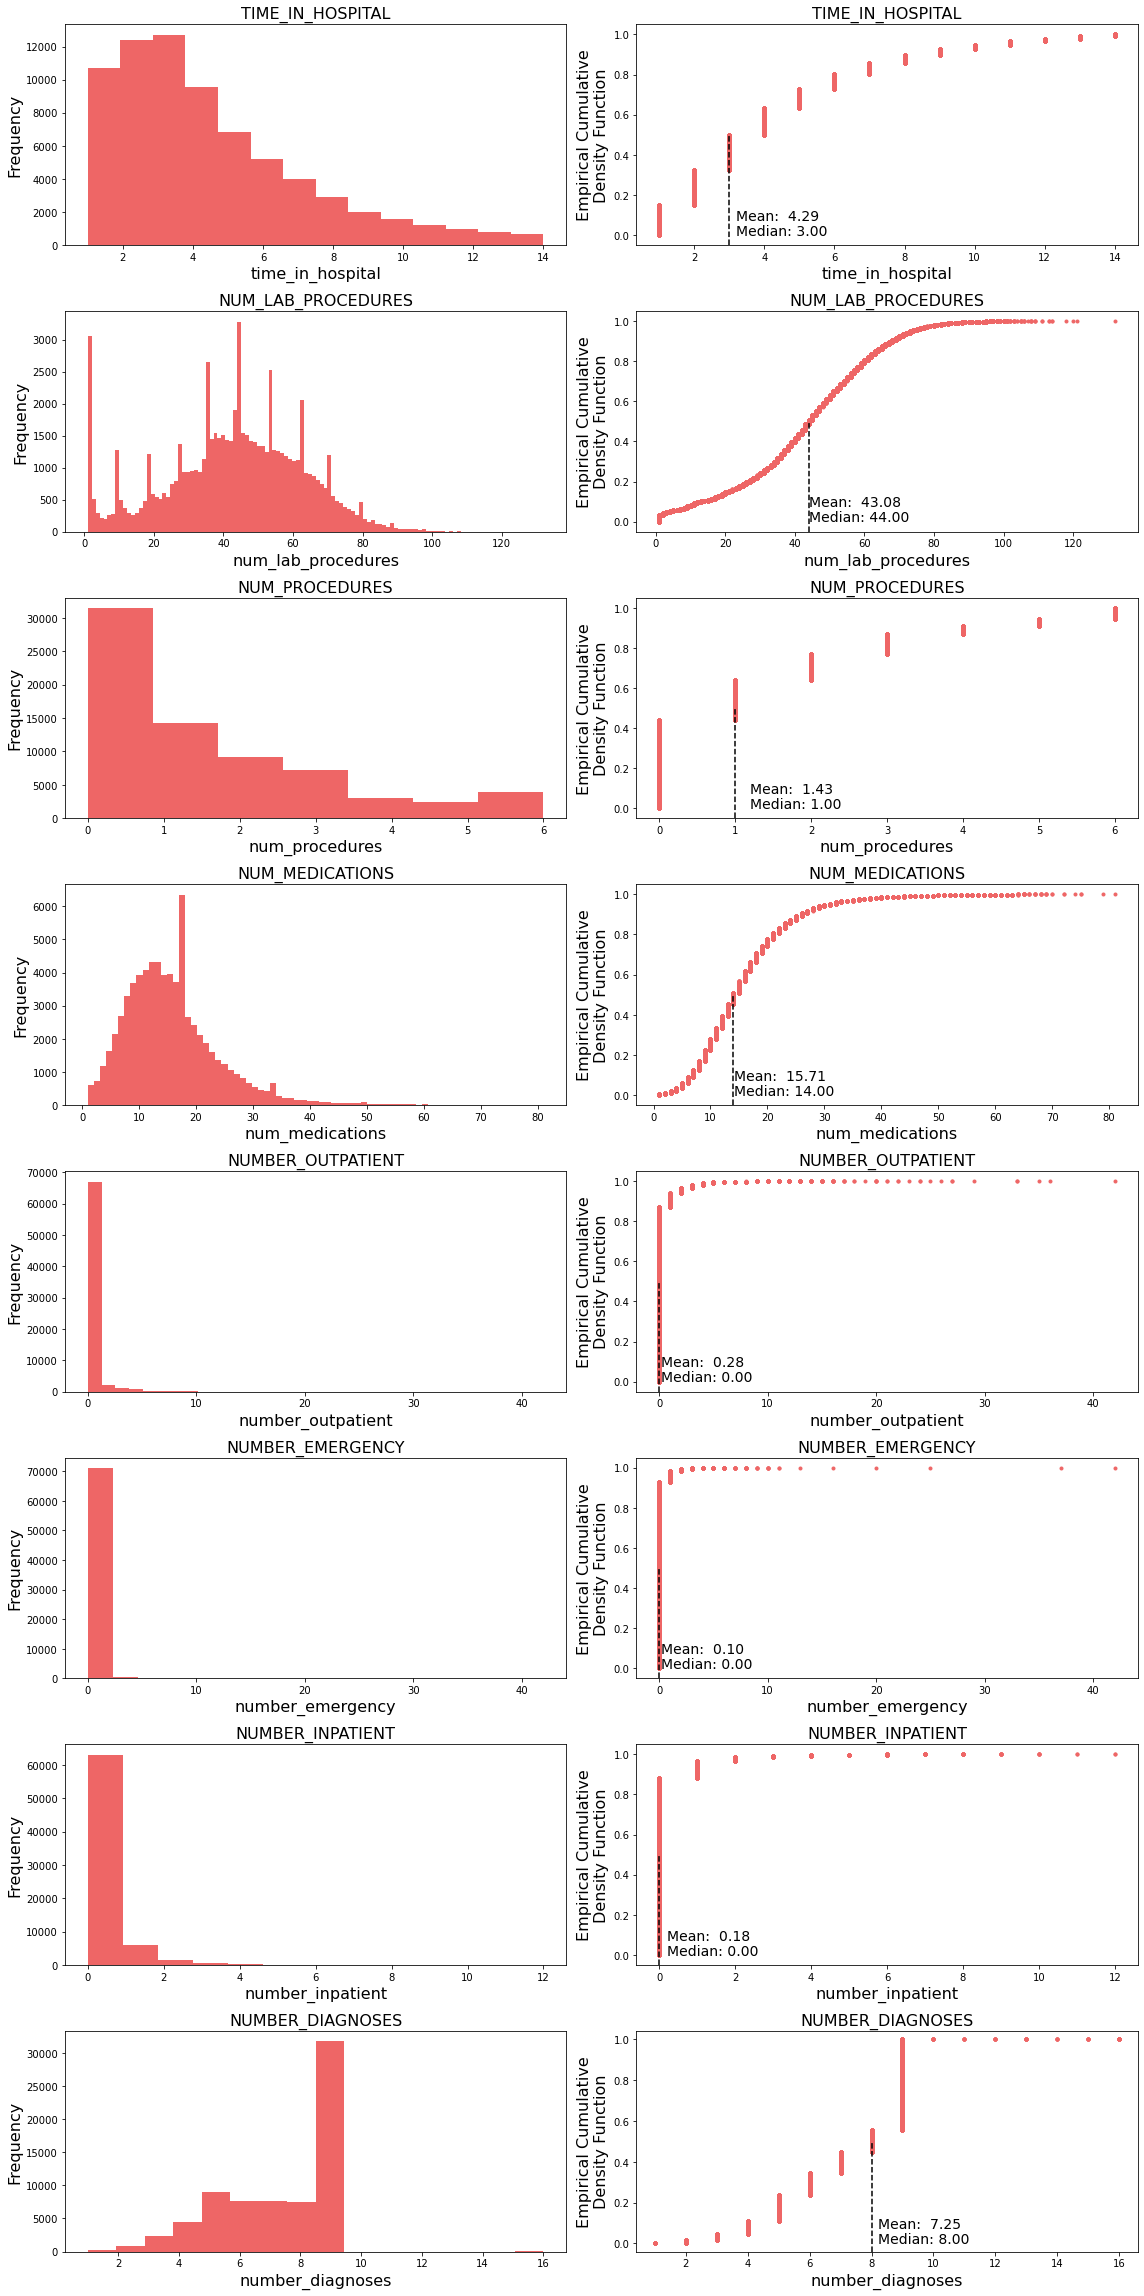

In [31]:
fig, axes = plt.subplots(nrows=len(quantitative_features), ncols=2, figsize=(16,32))

for idx, col in enumerate(quantitative_features):
    N = len(first_encounter[col])
    x_ = np.sort(first_encounter[col])
    y_ = np.arange(1, N+1)/N
    median = np.median(x_)
    mean = np.mean(x_)
    
    # Plot histogram
    axes[idx,0].hist(first_encounter[col], bins = first_encounter[col].nunique(), color = '#EE6666')
    axes[idx,0].set_xlabel(col, fontsize=16)
    axes[idx,0].set_ylabel("Frequency", fontsize=16)
    axes[idx,0].set_title(col.upper(), fontsize=16)

    # Plot ECDF
    axes[idx,1].plot(x_, y_, marker=".", linestyle='none', color = '#EE6666')
    axes[idx,1].set_xlabel(col, fontsize=16)
    axes[idx,1].set_ylabel("Empirical Cumulative\nDensity Function", fontsize=16)
    axes[idx,1].set_title(col.upper(), fontsize=16)
    axes[idx,1].axvline(median, 0, 0.5, color='black', linestyle="--")
    axes[idx,1].text(median + 0.2, 0.0,  "Median: {:.2f}".format(median), fontsize=14)
    axes[idx,1].text(median + 0.2, 0.075, "Mean:  {:.2f}".format(mean), fontsize=14)

    plt.margins(0.04)  
    plt.tight_layout()

LOG_SCALING:
    * 'number_inpatient'
    * 'number_outpatient'
    * 'number_emergency'
    * 'num_procedures'
    CLIPPING
    * 'num_medications'
    * 'num_lab_procedures'
    
Z_SCORE:  
    * 'time_in_hospital'
                            
FEATURE CLIPPING                         
'number_diagnoses'

## Number Diagnoses

In [34]:
first_encounter["number_diagnoses_clip"] = [9 if x>8 else x for x in first_encounter["number_diagnoses"]]

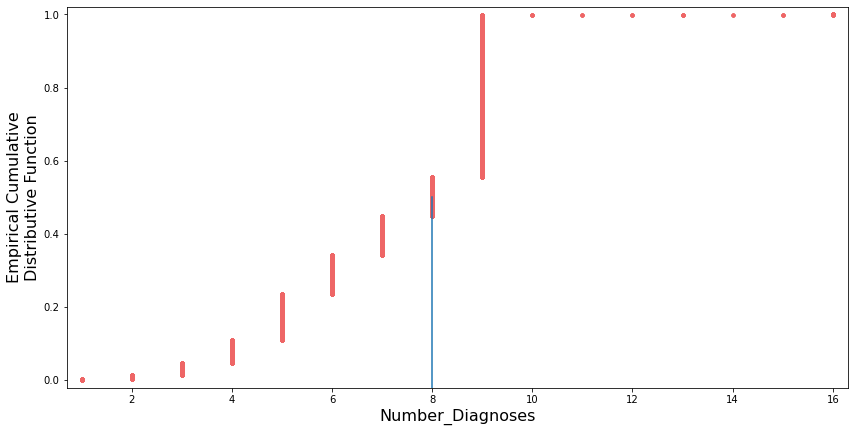

In [35]:
 compute_plot_ecdf(first_encounter, 'number_diagnoses', "Number_Diagnoses")

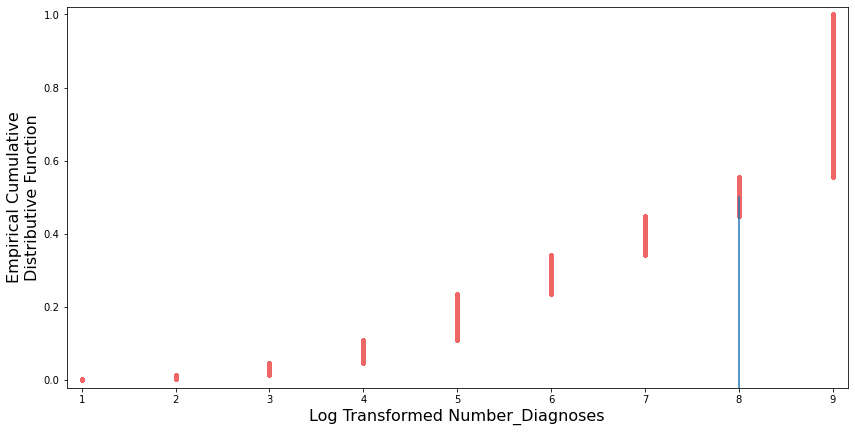

In [36]:
compute_plot_ecdf(first_encounter, "number_diagnoses_clip", "Log Transformed Number_Diagnoses")

In [37]:
first_encounter.drop("number_diagnoses", axis=1, inplace=True)

## Time in hospital

In [38]:
first_encounter['norm_time_in_hospital'] = zscore(first_encounter['time_in_hospital'])

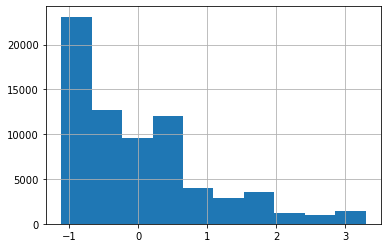

In [39]:
first_encounter['norm_time_in_hospital'].hist()

In [40]:
first_encounter['number_outpatient_log1p'] = np.log1p(first_encounter['number_outpatient'])
first_encounter['number_emergency_log1p'] = np.log1p(first_encounter['number_emergency'])
first_encounter['number_inpatient_log1p'] = np.log1p(first_encounter['number_inpatient'])
first_encounter['num_procedures_log1p'] = np.log1p(first_encounter['num_procedures'])
first_encounter['num_medications_log1p'] = np.log1p(first_encounter['num_medications'])
first_encounter['num_lab_procedures_log1p'] = np.log1p(first_encounter['num_lab_procedures'])

In [41]:
import seaborn as sns

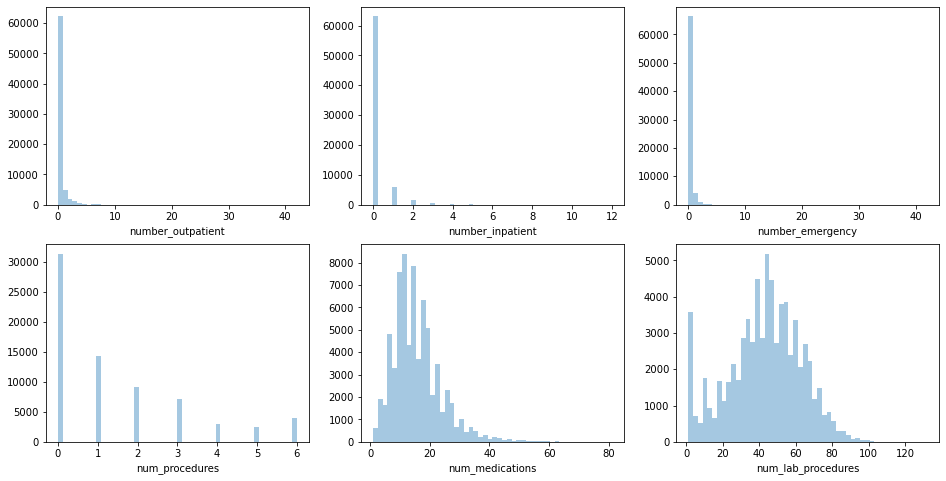

In [42]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=3)

# The amount of space above titles
y_title_margin = 1

sns.distplot(first_encounter["number_outpatient"], kde=False, ax=ax[0,0])
sns.distplot(first_encounter["number_inpatient"],  kde=False, ax=ax[0,1])
sns.distplot(first_encounter["number_emergency"],  kde=False, ax=ax[0,2])
sns.distplot(first_encounter["num_procedures"],  kde=False, ax=ax[1,0])
sns.distplot(first_encounter["num_medications"],  kde=False, ax=ax[1,1])
sns.distplot(first_encounter["num_lab_procedures"],  kde=False, ax=ax[1,2])

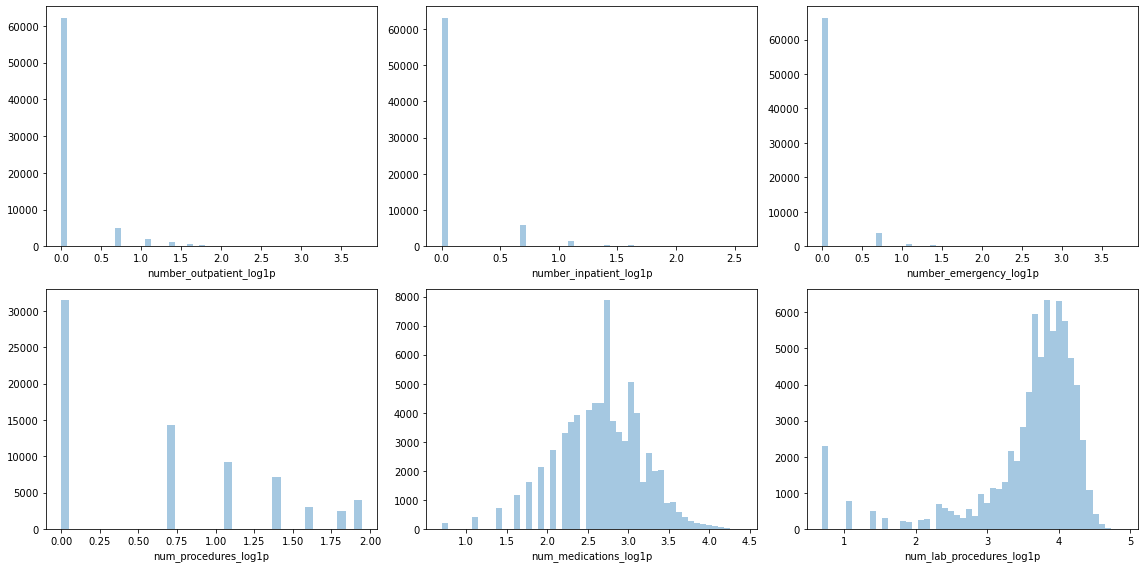

In [43]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=3)

# The amount of space above titles
y_title_margin = 1

sns.distplot(first_encounter["number_outpatient_log1p"], kde=False, ax=ax[0,0])
sns.distplot(first_encounter["number_inpatient_log1p"],  kde=False, ax=ax[0,1])
sns.distplot(first_encounter["number_emergency_log1p"],  kde=False, ax=ax[0,2])
sns.distplot(first_encounter["num_procedures_log1p"],  kde=False, ax=ax[1,0])
sns.distplot(first_encounter["num_medications_log1p"],  kde=False, ax=ax[1,1])
sns.distplot(first_encounter["num_lab_procedures_log1p"],  kde=False, ax=ax[1,2])
plt.tight_layout()

In [44]:
first_encounter.drop(['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses'], axis=1, inplace=True)

KeyError: "['number_diagnoses'] not found in axis"

In [ ]:
numeric_features = first_encounter.select_dtypes(exclude="O")
numeric_features.columns.tolist()

# Dead patients
Before any further data wrangling and feature engineering we will drop any observations that don't add any value to the data and data analysis. Patients who expired are unlikely to get readmitted. Information of patients who expired can be dropped. We can obtain their information from the supplementary information and the feature 'discharge_disposition_id'. 

In [45]:
first_encounter = first_encounter[~first_encounter['discharge_disposition_id'].isin([11, 19, 20, 21])]
# Reset the index
first_encounter.reset_index(inplace=True)

In [46]:
first_encounter.shape

(70434, 46)

# Imputing missing values

In [47]:
categorical_col_list = ['race','gender','age','metformin','repaglinide','nateglinide',
                        'chlorpropamide','glimepiride','glipizide','glyburide','tolbutamide',
                        'pioglitazone','rosiglitazone','acarbose','miglitol','tolazamide',
                        'insulin','glyburide-metformin','glipizide-metformin','change',
                        'diabetesMed','grouped_diag_1','grouped_diag_2','grouped_diag_3','readmitted_rescaled']

numerical_col_list = ['number_diagnoses_clip','number_outpatient_log1p','number_emergency_log1p',
                      'number_inpatient_log1p','num_procedures_log1p','num_medications_log1p',
                      'num_lab_procedures_log1p','norm_time_in_hospital']

In [48]:
def impute_categorical_df(df, col, impute_value="Unknown"):
    return df[col].fillna(impute_value)

def impute_numeric_df(df, col, impute_value=0):
    return df[col].fillna(impute_value)

def preprocess_df(df, categorical_col_list, numerical_col_list, categorical_impute_value="Unknown", numerical_impute_value=0):
    for c in categorical_col_list:
        df[c] = impute_categorical_df(df, c, impute_value=categorical_impute_value)
    for numerical_column in numerical_col_list:
        df[numerical_column] = impute_numeric_df(df, numerical_column, numerical_impute_value)
    return df

In [49]:
first_encounter_df = preprocess_df(first_encounter, numerical_col_list, categorical_col_list, categorical_impute_value="Unknown", numerical_impute_value=0)

/Users/rajesharasada/Downloads/[/Users/rajesharasada/desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rajesharasada/Downloads/[/Users/rajesharasada/desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [50]:
first_encounter_df

,index,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,grouped_diag_3,readmitted_rescaled,number_diagnoses_clip,norm_time_in_hospital,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p,num_procedures_log1p,num_medications_log1p,num_lab_procedures_log1p
0,0,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,...,03,0,8,2.953649,0.000000,0.000000,0.000000,1.098612,3.367296,4.234107
1,1,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,...,48,0,8,2.614573,0.000000,0.000000,0.000000,1.386294,2.944439,3.526361
2,2,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,25,0,5,-1.115266,0.000000,0.000000,0.000000,0.000000,2.197225,3.951244
3,3,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,...,99,0,9,1.597344,0.000000,0.000000,0.000000,1.098612,2.890372,3.871201
4,4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,...,25,0,9,-0.437113,0.000000,0.000000,0.000000,1.945910,2.833213,3.465736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70429,71513,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,...,25,0,9,1.597344,0.000000,0.000000,0.000000,1.098612,3.526361,3.931826
70430,71514,443842022,188574944,Other,Female,[40-50),1,1,7,14,...,51,0,9,3.292725,0.000000,0.693147,0.000000,1.945910,3.295837,4.304065
70431,71515,443842070,140199494,Other,Female,[60-70),1,1,7,2,...,40,0,9,-0.776190,0.693147,0.693147,0.693147,1.945910,2.890372,3.850148
70432,71516,443842340,120975314,Caucasian,Female,[80-90),1,1,7,5,...,30,0,9,0.241039,0.000000,0.693147,0.000000,0.693147,3.135494,4.343805


# one-hot encoding for categorical variable

In [51]:
categorical_col_list

['race',
 'gender',
 'age',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed',
 'grouped_diag_1',
 'grouped_diag_2',
 'grouped_diag_3',
 'readmitted_rescaled']

In [52]:
OHE = pd.get_dummies(first_encounter_df[categorical_col_list], drop_first=True)
OHE.shape

(70434, 374)

In [53]:
first_encounter_df.drop(categorical_col_list, axis=1, inplace=True)

/Users/rajesharasada/Downloads/[/Users/rajesharasada/desktop/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
first_encounter_OHE = pd.concat([first_encounter_df[numerical_col_list], OHE], axis=1)
first_encounter_OHE

,number_diagnoses_clip,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p,num_procedures_log1p,num_medications_log1p,num_lab_procedures_log1p,norm_time_in_hospital,readmitted_rescaled,race_AfricanAmerican,...,grouped_diag_3_E8,grouped_diag_3_E9,grouped_diag_3_V0,grouped_diag_3_V1,grouped_diag_3_V2,grouped_diag_3_V4,grouped_diag_3_V5,grouped_diag_3_V6,grouped_diag_3_V7,grouped_diag_3_V8
0,8,0.000000,0.000000,0.000000,1.098612,3.367296,4.234107,2.953649,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0.000000,0.000000,0.000000,1.386294,2.944439,3.526361,2.614573,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0.000000,0.000000,0.000000,0.000000,2.197225,3.951244,-1.115266,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0.000000,0.000000,0.000000,1.098612,2.890372,3.871201,1.597344,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9,0.000000,0.000000,0.000000,1.945910,2.833213,3.465736,-0.437113,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70429,9,0.000000,0.000000,0.000000,1.098612,3.526361,3.931826,1.597344,0,0,...,0,0,0,0,0,0,0,0,0,0
70430,9,0.000000,0.693147,0.000000,1.945910,3.295837,4.304065,3.292725,0,0,...,0,0,0,0,0,0,0,0,0,0
70431,9,0.693147,0.693147,0.693147,1.945910,2.890372,3.850148,-0.776190,0,0,...,0,0,0,0,0,0,0,0,0,0
70432,9,0.000000,0.693147,0.000000,0.693147,3.135494,4.343805,0.241039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
first_encounter_OHE.to_csv("../data/processed/first_encounter_OHE.csv", index=False)